In [2]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy import stats

# Census API Key
from config import census_api_key
c = census_api_key

In [3]:
#Census API URL
ten_url = "https://api.census.gov/data/2010/dec/responserate?get=NAME,GEO_ID,FSRR2010&for=county:*&in=state:*&key=" + c
response = requests.get(ten_url).json()

In [4]:
# Array
NAME = []
Geo_ID = []
FSRR2010 = []
State = []
County = []

# original 2010 Census column order
for county in response:
    NAME.append (county[0])
    Geo_ID.append(county[1])
    FSRR2010.append(county[2])
    State.append(county[3])
    County.append(county[4])
    
# Renamed columns from 2010 Census
counties_2010_df= pd.DataFrame ({'County, State':NAME,
                                 'GEO ID':Geo_ID,
                                 'FSRR2010':FSRR2010,
                                 'State':State,
                                 'County':County})
# Organized index, starting from 0
counties_2010_df.drop(index=0,inplace=True)


counties_2010_df.head()


,"County, State",GEO ID,FSRR2010,State,County
1,"Autauga County, Alabama",0500000US01001,68.6,01,001
2,"Baldwin County, Alabama",0500000US01003,59.4,01,003
3,"Barbour County, Alabama",0500000US01005,55.2,01,005
4,"Bibb County, Alabama",0500000US01007,54.8,01,007
5,"Blount County, Alabama",0500000US01009,66.3,01,009


In [5]:
counties_2010_df.to_csv("CSV_files/decennial_2010.csv", index=False)

In [6]:
#Imported cleand broadband
clean_broadband_df = pd.read_csv("CSV_files/clean_broadband.csv")

broadband_2010_df = clean_broadband_df.loc[clean_broadband_df["Year"] == 2010]
broadband_2010_df.head()

,State,County,Year,GEO ID,Broadband (%),CFIPS
5,Alabama,Baldwin County,2010,0500000US01003,73.008549,1003
34,Alabama,Calhoun County,2010,0500000US01015,77.849883,1015
129,Alabama,Jefferson County,2010,0500000US01073,69.696546,1073
174,Alabama,Madison County,2010,0500000US01089,69.466758,1089
196,Alabama,Mobile County,2010,0500000US01097,73.317450,1097


In [7]:
# Setting up array for merge
name = []

for index, row in broadband_2010_df.iterrows():
    name.append(f'{row["County"]}, {row["State"]}')


broadband_2010_df = pd.DataFrame({"Name": name,
                                 "Broadband (%)":broadband_2010_df["Broadband (%)"],
                                 "GEO ID": broadband_2010_df["GEO ID"]})
broadband_2010_df.head()

,Name,Broadband (%),GEO ID
5,"Baldwin County, Alabama",73.008549,0500000US01003
34,"Calhoun County, Alabama",77.849883,0500000US01015
129,"Jefferson County, Alabama",69.696546,0500000US01073
174,"Madison County, Alabama",69.466758,0500000US01089
196,"Mobile County, Alabama",73.317450,0500000US01097


In [8]:
# Merged broadband dataframe and counties 2010 dataframe
merged2010_df = pd.merge(counties_2010_df, broadband_2010_df, how='inner', on='GEO ID')

merged2010_df.to_csv("CSV_files/merged2010_df.csv")
merged2010_df.head()

,"County, State",GEO ID,FSRR2010,State,County,Name,Broadband (%)
0,"Baldwin County, Alabama",0500000US01003,59.4,01,003,"Baldwin County, Alabama",73.008549
1,"Calhoun County, Alabama",0500000US01015,65.1,01,015,"Calhoun County, Alabama",77.849883
2,"Jefferson County, Alabama",0500000US01073,64.8,01,073,"Jefferson County, Alabama",69.696546
3,"Madison County, Alabama",0500000US01089,69.9,01,089,"Madison County, Alabama",69.466758
4,"Mobile County, Alabama",0500000US01097,63,01,097,"Mobile County, Alabama",73.317450


In [9]:
#Reading broadband data
broadband_data = pd.read_csv("CSV_files/merged2010_df.csv")
broadband_data.head()

,Unnamed: 0,"County, State",GEO ID,FSRR2010,State,County,Name,Broadband (%)
0,0,"Baldwin County, Alabama",0500000US01003,59.4,1,3,"Baldwin County, Alabama",73.008549
1,1,"Calhoun County, Alabama",0500000US01015,65.1,1,15,"Calhoun County, Alabama",77.849883
2,2,"Jefferson County, Alabama",0500000US01073,64.8,1,73,"Jefferson County, Alabama",69.696546
3,3,"Madison County, Alabama",0500000US01089,69.9,1,89,"Madison County, Alabama",69.466758
4,4,"Mobile County, Alabama",0500000US01097,63.0,1,97,"Mobile County, Alabama",73.317450


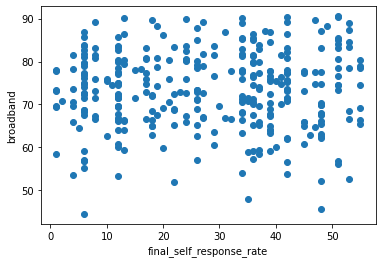

In [12]:
# Plot the linear model on top of scatter plot 
broadband = broadband_data.iloc[:,7]
final_self_response_rate = broadband_data.iloc[:,4]
plt.scatter(final_self_response_rate,broadband)
#plt.plot(broadband,"--")
#plt.xticks(final_self_response_rate, rotation=90)
plt.xlabel('final_self_response_rate')
plt.ylabel('broadband')
plt.show()
